This is where I am going to write out my code for this project.

Louisville Animal Shelter Data: https://data.louisvilleky.gov/datasets/louisville-metro-ky-animal-service-intake-and-outcome/about
Nationwide Animal Shelter Data: https://www.shelteranimalscount.org/data-request-free-download/
Dallas Animal Shelter Data: https://www.dallasopendata.com/Services/Dallas-Animal-Shelter-Data-Fiscal-Year-2022-2023/f77p-sgrc/about_data


In [1]:
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import pandas as pd
import numpy as np


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Melis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Melis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv('Animal_IO_Data.csv')
df['indate'] = pd.to_datetime(df['indate'], errors='coerce')
df = df[df['indate'].dt.year == 2022]

print(df)

         kennel animalid jurisdiction      intype insubtype     indate  \
1       FREEZER  A617968        40215   OWNER SUR     FIELD 2022-12-14   
25          N18  A678153        40212       STRAY     FIELD 2022-02-15   
27     ACO UNIT  A678153        40212  CONFISCATE  EVICTION 2022-01-13   
37         ID04  A692417        40214       STRAY       OTC 2022-02-10   
48          N07  A648980        40211       STRAY     FIELD 2022-12-16   
...         ...      ...          ...         ...       ...        ...   
51921      SNIP  A704643        40208       STRAY       OTC 2022-01-24   
52228      LOST  A729871          NaN        LOST       WEB 2022-04-20   
52256      LOST  A730892          NaN        LOST       WEB 2022-12-21   
52432      SNIP  A704513        40291       STRAY       OTC 2022-01-04   
52581      LOST  A731300          NaN        LOST       WEB 2022-06-17   

      surreason   outtype outsubtype              outdate animaltype sex  \
1         STRAY      EUTH  REQUESTE

Want to import another city's data, to have a closer comparison.  I was seeing an erorr with the data before importing, so I did research and found the "usecols" function.

In [4]:
columns_to_include = ['Animal Type', 'Animal Breed', 'Intake Type', 'Intake Subtype', 'Intake Date', 'Outcome Type', 'Outcome Subtype', 'Month', 'Year']
df3 = pd.read_csv('Dallas_Animal_Shelter_Data_Fiscal_Year_2022_-_2023.csv', usecols=columns_to_include)
df3['Intake Date'] = pd.to_datetime(df3['Intake Date'], errors='coerce')
df3 = df3[df3['Intake Date'].dt.year == 2022]
print(df3)

      Animal Type     Animal Breed      Intake Type Intake Subtype  \
4             DOG    SCHNAUZER MIN         TRANSFER          STRAY   
6             DOG            HUSKY            STRAY       AT LARGE   
11            DOG     CHIHUAHUA SH  OWNER SURRENDER         URGENT   
16            DOG      MIXED BREED  OWNER SURRENDER        APPOINT   
20            DOG     CHIHUAHUA SH  OWNER SURRENDER        WALK IN   
...           ...              ...              ...            ...   
34435         CAT        CHARTREUX            STRAY            WEB   
34451         DOG  AM PIT BULL TER            STRAY            WEB   
34461         DOG      COCKER SPAN            STRAY            WEB   
34464         DOG    LABRADOR RETR            STRAY            WEB   
34472         DOG          MALTESE            STRAY            WEB   

      Intake Date Outcome Type Outcome Subtype   Month    Year  
4      2022-11-08     TRANSFER         GENERAL  FY2024  FY2023  
6      2022-12-16   EUTHANIZE

In [5]:
df2 = pd.read_excel('3 year 21-22-23 SAC Agg.xlsx')
df2.drop(columns=['Organizations'], inplace=True)
for col in df2.columns:
    print(col)
df2.dtypes
df2 = df2[df2['Year'] == 2022]
df2.reset_index(drop=True, inplace=True)
df2 = df2[df2['State'].isin(['KY', 'TX'])]  

State
Year
Intake - Relinquished By Owner Total-Feline
Intake - Stray At Large Total-Feline
Intake - Transferred In Total-Feline
Intake - Owner Intended Euthanasia Total-Feline
Intakes - Other Intakes Total-Feline
Live Outcome - Adoption Total-Feline
Live Outcome - Returned To Owner Total-Feline
Live Outcome - Returned To Field Total-Feline
Live Outcome - Transferred Out Total-Feline
Live outcome - Other Live Outcome Total-Feline
Other Outcome - Died In Care Total-Feline
Other Outcome - Lost In Care Total-Feline
Other Outcome - Owner Intended Euthanasia Total-Feline
Other Outcome - Shelter Euthanasia Total-Feline
Intake - Relinquished By Owner Total-Canine
Intake - Stray At Large Total-Canine
Intake - Transferred In Total-Canine
Intake - Owner Intended Euthanasia Total-Canine
Intakes - Other Intakes Total-Canine
Live Outcome - Adoption Total-Canine
Live Outcome - Returned To Owner Total-Canine
Live Outcome - Returned To Field Total-Canine
Live Outcome - Transferred Out Total-Canine
Liv

In [6]:
print(df2)

   State  Year  Intake - Relinquished By Owner Total-Feline  \
16    KY  2022                                         5933   
43    TX  2022                                        21698   

    Intake - Stray At Large Total-Feline  \
16                                  7174   
43                                 35938   

    Intake - Transferred In Total-Feline  \
16                                  2716   
43                                 20682   

    Intake - Owner Intended Euthanasia Total-Feline  \
16                                               65   
43                                              918   

    Intakes - Other Intakes Total-Feline  \
16                                   482   
43                                  7034   

    Live Outcome - Adoption Total-Feline  \
16                                  8872   
43                                 52341   

    Live Outcome - Returned To Owner Total-Feline  \
16                                            348   
43    

In [7]:
pattern_of_intake = 'Intake'
pattern_of_outcome = 'Outcome'
intake_columns = [col for col in df2.columns if pattern_of_intake in col]
outcome_columns = [col for col in df2.columns if pattern_of_outcome in col]
df2['Total_Intakes'] = df2[intake_columns].sum(axis=1)
df2['Total_Outcomes'] = df2[outcome_columns].sum(axis=1)
print(df2[['State', 'Total_Intakes', 'Total_Outcomes']])

   State  Total_Intakes  Total_Outcomes
16    KY          34792           33060
43    TX         209938          206459


In [8]:
df.drop(columns=['kennel', 'animalid', 'jurisdiction', 'sex', 'color', 'breed', 'sourcezipcode', 'ObjectId'], inplace=True)
df = df.dropna()
print (df)

           intype insubtype     indate surreason   outtype outsubtype  \
1       OWNER SUR     FIELD 2022-12-14     STRAY      EUTH  REQUESTED   
25          STRAY     FIELD 2022-02-15     STRAY  ADOPTION    WALK IN   
27     CONFISCATE  EVICTION 2022-01-13   UNKNOWN       RTO   IN FIELD   
37          STRAY       OTC 2022-02-10     STRAY       RTO  IN KENNEL   
48          STRAY     FIELD 2022-12-16     STRAY  ADOPTION    WALK IN   
...           ...       ...        ...       ...       ...        ...   
51763       STRAY       OTC 2022-01-24     STRAY       TNR  CARETAKER   
51915       STRAY       OTC 2022-01-04     STRAY       TNR  CARETAKER   
51918       STRAY       OTC 2022-01-04     STRAY       TNR  CARETAKER   
51921       STRAY       OTC 2022-01-24     STRAY       TNR  CARETAKER   
52432       STRAY       OTC 2022-01-04     STRAY       TNR  CARETAKER   

                   outdate animaltype bites petsize  
1      2022-12-14 00:00:00        DOG     N     MED  
25     2022-03-

In [9]:
df['indate'] = pd.to_datetime(df['indate'])
df_remove =df[~df['indate'].dt.year.isin([2024, 2025])]
df['outdate'] = pd.to_datetime(df['outdate'])
df_remove =df[~df['outdate'].dt.year.isin([2024, 2025])]
print(df)

           intype insubtype     indate surreason   outtype outsubtype  \
1       OWNER SUR     FIELD 2022-12-14     STRAY      EUTH  REQUESTED   
25          STRAY     FIELD 2022-02-15     STRAY  ADOPTION    WALK IN   
27     CONFISCATE  EVICTION 2022-01-13   UNKNOWN       RTO   IN FIELD   
37          STRAY       OTC 2022-02-10     STRAY       RTO  IN KENNEL   
48          STRAY     FIELD 2022-12-16     STRAY  ADOPTION    WALK IN   
...           ...       ...        ...       ...       ...        ...   
51763       STRAY       OTC 2022-01-24     STRAY       TNR  CARETAKER   
51915       STRAY       OTC 2022-01-04     STRAY       TNR  CARETAKER   
51918       STRAY       OTC 2022-01-04     STRAY       TNR  CARETAKER   
51921       STRAY       OTC 2022-01-24     STRAY       TNR  CARETAKER   
52432       STRAY       OTC 2022-01-04     STRAY       TNR  CARETAKER   

         outdate animaltype bites petsize  
1     2022-12-14        DOG     N     MED  
25    2022-03-04        DOG     N  

I am going to combine all the intake columns into one, and do the same for the outtake columns.  I did use AI to help with this.


In [10]:
intake_columns = [col for col in df2.columns if 'Intake' in col]
df2['Combined_National_Intake'] = df2[intake_columns].sum(axis=1)
outtake_columns = [col for col in df2.columns if 'Outcome' in col]
df2['Combined_National_Outcome'] = df2[outtake_columns].sum(axis=1)
print(df2)

   State  Year  Intake - Relinquished By Owner Total-Feline  \
16    KY  2022                                         5933   
43    TX  2022                                        21698   

    Intake - Stray At Large Total-Feline  \
16                                  7174   
43                                 35938   

    Intake - Transferred In Total-Feline  \
16                                  2716   
43                                 20682   

    Intake - Owner Intended Euthanasia Total-Feline  \
16                                               65   
43                                              918   

    Intakes - Other Intakes Total-Feline  \
16                                   482   
43                                  7034   

    Live Outcome - Adoption Total-Feline  \
16                                  8872   
43                                 52341   

    Live Outcome - Returned To Owner Total-Feline  \
16                                            348   
43    

In [11]:
df2_grouping = df2.groupby('State' , as_index=False)['Combined_National_Intake'].sum()
df2_grouping2 = df2.groupby('State' , as_index=False)['Combined_National_Outcome'].sum()
df2_grouped = pd.merge(df2_grouping, df2_grouping2, on='State')
print("Grouped by state and sum total:")
print(df2_grouped)

Grouped by state and sum total:
  State  Combined_National_Intake  Combined_National_Outcome
0    KY                     69584                      66120
1    TX                    419876                     412918


In [12]:
df = df.reset_index(drop=True)
df3 = df3.reset_index(drop=True)
merged_df = pd.concat([df, df3], axis=1)

df.columns = ['Louisville_' + col for col in df.columns]
df3.columns = ['Dallas_' + col for col in df3.columns]

merged_df = pd.concat([df, df3], axis=1)

print(merged_df)

     Louisville_intype Louisville_insubtype Louisville_indate  \
0            OWNER SUR                FIELD        2022-12-14   
1                STRAY                FIELD        2022-02-15   
2           CONFISCATE             EVICTION        2022-01-13   
3                STRAY                  OTC        2022-02-10   
4                STRAY                FIELD        2022-12-16   
...                ...                  ...               ...   
7680             STRAY                  OTC        2022-01-24   
7681             STRAY                  OTC        2022-01-04   
7682             STRAY                  OTC        2022-01-04   
7683             STRAY                  OTC        2022-01-24   
7684             STRAY                  OTC        2022-01-04   

     Louisville_surreason Louisville_outtype Louisville_outsubtype  \
0                   STRAY               EUTH             REQUESTED   
1                   STRAY           ADOPTION               WALK IN   
2        

combined_df = pd.concat([df, df3], axis=0, ignore_index=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(combined_df)

combined_df_filled = combined_df.fillna("")
print(combined_df_filled)

In [13]:
merged_df.to_csv('combined_data7.csv', index=False)

In [14]:
louisville_animal_count = merged_df['Louisville_animaltype'].value_counts()
dallas_animal_count = merged_df['Dallas_Animal Type'].value_counts()
print("Louisville Animal Type Counts:")
print(louisville_animal_count)
print("\nDallas Animal Type Counts:")
print(dallas_animal_count)


Louisville Animal Type Counts:
Louisville_animaltype
DOG           4522
CAT           2921
RABBIT         146
OTHER           59
BIRD            24
LIVESTOCK       10
GUINEA PIG       3
Name: count, dtype: int64

Dallas Animal Type Counts:
Dallas_Animal Type
DOG          5586
CAT          1528
WILDLIFE      107
BIRD           35
LIVESTOCK      10
Name: count, dtype: int64


In [15]:
louisville_mode = merged_df['Louisville_animaltype'].mode()[0]
dallas_mode = merged_df['Dallas_Animal Type'].mode()[0]

print(f"Most common Louisville Animal Type: {louisville_mode}")
print(f"Most common Dallas Animal Type: {dallas_mode}")

Most common Louisville Animal Type: DOG
Most common Dallas Animal Type: DOG


In [16]:
print("Louisville Animal Type Counts:")
print(louisville_animal_count)
print("\nDallas Animal Type Counts:")
print(dallas_animal_count)

Louisville Animal Type Counts:
Louisville_animaltype
DOG           4522
CAT           2921
RABBIT         146
OTHER           59
BIRD            24
LIVESTOCK       10
GUINEA PIG       3
Name: count, dtype: int64

Dallas Animal Type Counts:
Dallas_Animal Type
DOG          5586
CAT          1528
WILDLIFE      107
BIRD           35
LIVESTOCK      10
Name: count, dtype: int64


In [17]:
import matplotlib.pyplot as plt
louisville_animal_count = merged_df['Louisville_animaltype'].value_counts()
dallas_animal_count = merged_df['Dallas_Animal Type'].value_counts()

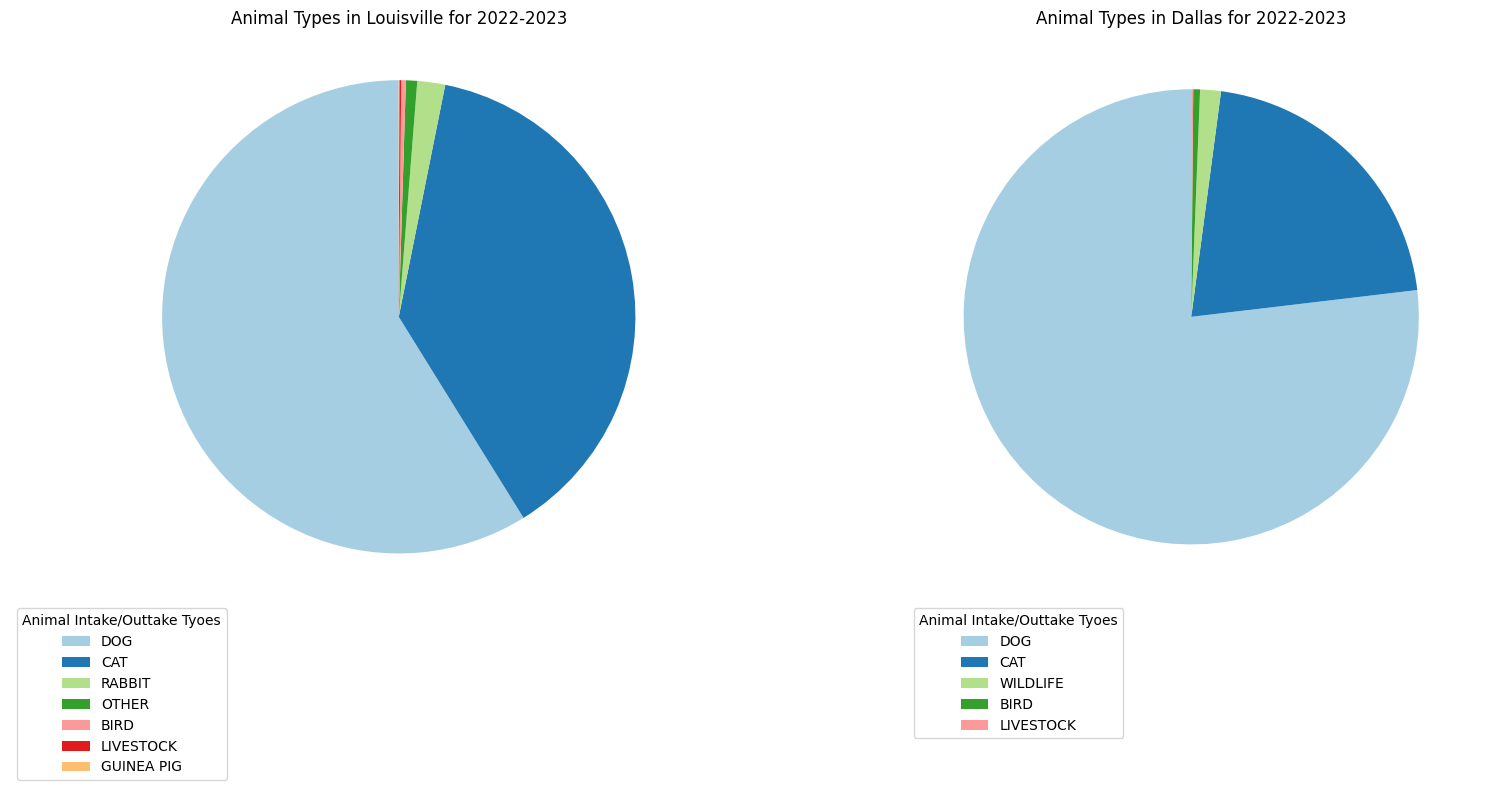

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
patches, texts = ax1.pie(
    louisville_animal_count, 
    autopct= None, 
    startangle=90,
    colors=plt.cm.Paired.colors,
    labels=None
)
ax1.set_title('Animal Types in Louisville for 2022-2023')
ax1.legend(patches, louisville_animal_count.index, title="Animal Intake/Outtake Tyoes", loc="upper left", bbox_to_anchor=(0,0))
ax1.axis('equal') 
patches2, texts2 = ax2.pie(
    dallas_animal_count, 
    autopct= None, 
    startangle=90,
    colors=plt.cm.Paired.colors, 
    labels=None
)
ax2.set_title('Animal Types in Dallas for 2022-2023')
ax2.legend(patches, dallas_animal_count.index, title="Animal Intake/Outtake Tyoes", loc="upper left", bbox_to_anchor=(0,0))
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [19]:
louisville_outcome_count = merged_df['Louisville_outtype'].value_counts()
dallas_outcome_count = merged_df['Dallas_Outcome Type'].value_counts()
print("Louisville Outcome Counts:")
print(louisville_outcome_count)
print("\nDallas Outcome Counts:")
print(dallas_outcome_count)

Louisville Outcome Counts:
Louisville_outtype
ADOPTION     2697
FOSTER       1290
RTO          1227
TRANSFER     1009
TNR           555
EUTH          540
DISPOSAL      173
TRANSPORT     103
DIED           87
LOST            4
Name: count, dtype: int64

Dallas Outcome Counts:
Dallas_Outcome Type
ADOPTION             2278
EUTHANIZED           1132
LOST EXP             1055
RETURNED TO OWNER     819
TRANSFER              570
FOSTER                554
TREATMENT             393
FOUND EXP             293
DISPOSAL               54
DIED                   52
WILDLIFE               40
SNR                    19
MISSING                 7
Name: count, dtype: int64


In [20]:
louisville_total = louisville_outcome_count.sum()
dallas_total = dallas_outcome_count.sum()
louisville_percentage = (louisville_outcome_count / louisville_total) * 100
dallas_percentage = (dallas_outcome_count / dallas_total) * 100
print ("Louisville Outcome Percentages of Total:")
print(louisville_percentage)
print ("Dallas Outcome Percentages of Total:")
print(dallas_percentage)

Louisville Outcome Percentages of Total:
Louisville_outtype
ADOPTION     35.094340
FOSTER       16.785947
RTO          15.966168
TRANSFER     13.129473
TNR           7.221861
EUTH          7.026675
DISPOSAL      2.251139
TRANSPORT     1.340273
DIED          1.132075
LOST          0.052049
Name: count, dtype: float64
Dallas Outcome Percentages of Total:
Dallas_Outcome Type
ADOPTION             31.351500
EUTHANIZED           15.579411
LOST EXP             14.519681
RETURNED TO OWNER    11.271676
TRANSFER              7.844756
FOSTER                7.624553
TREATMENT             5.408753
FOUND EXP             4.032480
DISPOSAL              0.743187
DIED                  0.715662
WILDLIFE              0.550509
SNR                   0.261492
MISSING               0.096339
Name: count, dtype: float64


This code below took a lot of research and tweaking.  It may seem repetitive, but I finally got it to work to my satisfaction!

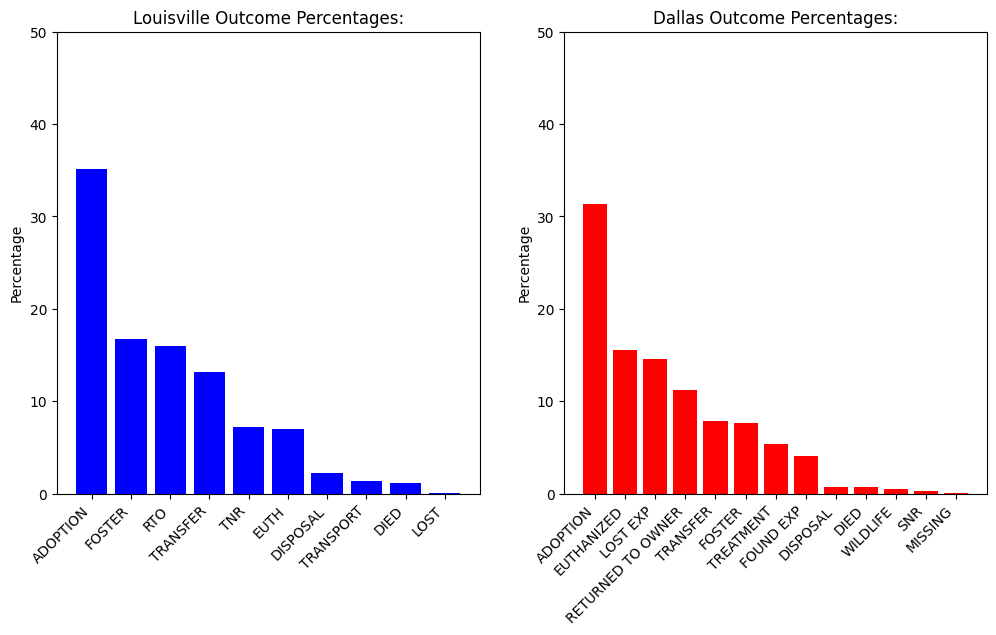

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes[0].bar(louisville_percentage.index, louisville_percentage, color='blue')
axes[0].set_title("Louisville Outcome Percentages:")
axes[0].set_xticks(range(len(louisville_percentage.index)))  
axes[0].set_xticklabels(louisville_percentage.index, rotation=45, ha='right')
axes[0].set_ylim(0, 50)
axes[0].set_ylabel("Percentage")
axes[0].tick_params(axis='y', which='both', labelleft=True)
axes[1].bar(dallas_percentage.index, dallas_percentage, color='red')
axes[1].set_title("Dallas Outcome Percentages:")
axes[1].set_xticks(range(len(dallas_percentage.index)))  
axes[1].set_xticklabels(dallas_percentage.index, rotation=45, ha='right')
axes[1].set_ylim(0, 50)
axes[1].set_ylabel("Percentage")
axes[1].tick_params(axis='y', which='both', labelleft=True)

plt.tight_layout
plt.show()


Now I want to create a visual that shows the amount of each set of data and their outcomes.  This is where I want to include the nationwide numbers just to compare

In [22]:
print(merged_df)

     Louisville_intype Louisville_insubtype Louisville_indate  \
0            OWNER SUR                FIELD        2022-12-14   
1                STRAY                FIELD        2022-02-15   
2           CONFISCATE             EVICTION        2022-01-13   
3                STRAY                  OTC        2022-02-10   
4                STRAY                FIELD        2022-12-16   
...                ...                  ...               ...   
7680             STRAY                  OTC        2022-01-24   
7681             STRAY                  OTC        2022-01-04   
7682             STRAY                  OTC        2022-01-04   
7683             STRAY                  OTC        2022-01-24   
7684             STRAY                  OTC        2022-01-04   

     Louisville_surreason Louisville_outtype Louisville_outsubtype  \
0                   STRAY               EUTH             REQUESTED   
1                   STRAY           ADOPTION               WALK IN   
2        

In [23]:
count = merged_df['Louisville_intype'].count()
print("Total of Louisville intakes in 2022:  ", count)

merged_df['Dallas_Intake Date'] = pd.to_datetime(merged_df['Dallas_Intake Date'], errors='coerce')
count2 = merged_df['Dallas_Intake Type'].count()
print("Total of Dallas intakes in 2022:  ", count2)

print(df2_grouped)

Total of Louisville intakes in 2022:   7685
Total of Dallas intakes in 2022:   7266
  State  Combined_National_Intake  Combined_National_Outcome
0    KY                     69584                      66120
1    TX                    419876                     412918


Now I want to compare the amount of intakes to each state (Louisville to KY, Dallas to TX)

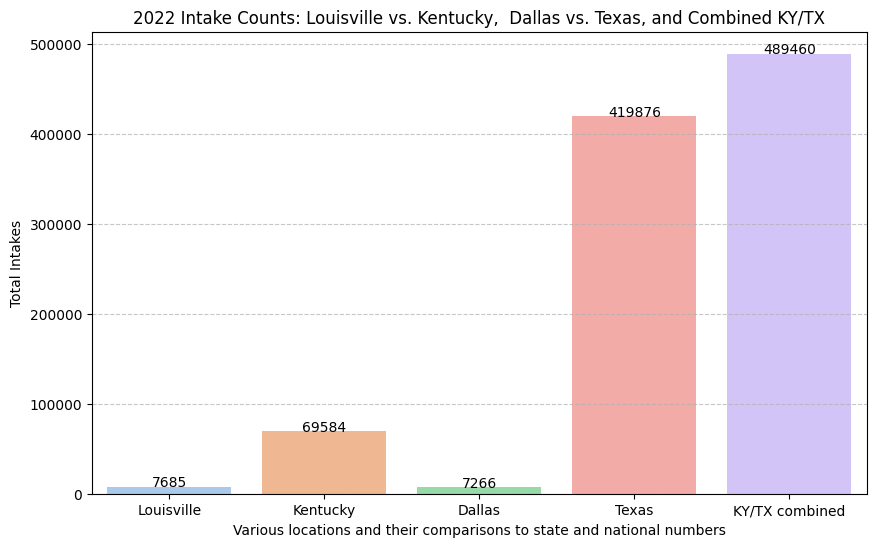

In [24]:
state_intakes = df2_grouped.set_index('State')['Combined_National_Intake']

louisville_intake = merged_df['Louisville_intype'].count()
dallas_intake = merged_df['Dallas_Intake Type'].count()
ky_intake = state_intakes.get('KY', 0)
tx_intake = state_intakes.get('TX', 0)

national_intake = df2_grouped['Combined_National_Intake'].sum()

labels = ['Louisville', 'Kentucky', 'Dallas', 'Texas', 'KY/TX combined']
values = [louisville_intake, ky_intake, dallas_intake, tx_intake, national_intake]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values, hue=labels, palette='pastel', legend=False)

plt.title("2022 Intake Counts: Louisville vs. Kentucky,  Dallas vs. Texas, and Combined KY/TX")
plt.xlabel("Various locations and their comparisons to state and national numbers")
plt.ylabel("Total Intakes")
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(values):
    plt.text(i, v + 100, str(v), ha='center', fontsize=10)

plt.show()
